In [1]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import numpy as np
import pandas as pd
import requests
from matplotlib import pyplot as plt

In [2]:
Biomass = pd.read_csv('../data/exp_data/Biomass.csv')

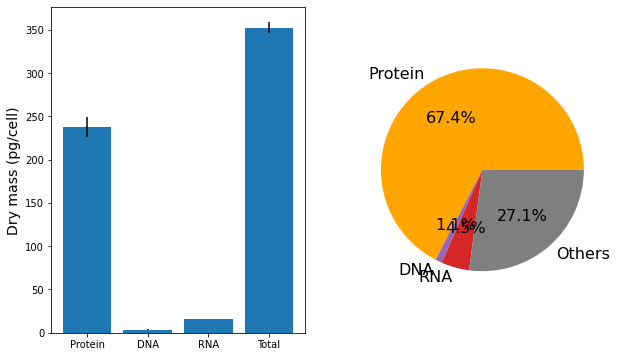

In [21]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].bar(Biomass.Component,Biomass.mass_avg,yerr=Biomass.mass_std)
axs[0].set_ylabel('Dry mass (pg/cell)',fontsize=14)
mass_frac=list(np.array(Biomass.mass_avg)/max(Biomass.mass_avg))[:-1]
mass_frac.append(1-sum(mass_frac))
axs[1].pie(mass_frac,labels=['Protein','DNA','RNA','Others'],autopct='%1.1f%%',textprops={'fontsize': 16},
          colors=['orange','tab:purple','tab:red','tab:grey']);

# Amino acids

In [ ]:
pep_ids=[]; pep_seq=[];
for seq_record in SeqIO.parse( '../data/blast_results/Sus_scrofa.Sscrofa10.2.pep.all.fa' , "fasta"):
    ID = str(seq_record.description).split('.')[0].strip()
    pep_ids.append(ID); pep_seq.append( str(seq_record.seq).strip() )
pep_pd = pd.DataFrame(zip(pep_ids,pep_seq),columns=['id','seq'])

In [ ]:
proteome = pd.read_csv('../data/blast_results/9823-PXD145877_Mueller_Nature_2020_Sus_scrofa_LLC-PK1_kidney.txt',\
                       sep='\t',comment='#',header=None, names=['id','abundance'])
id_list = [x.split('.')[1].strip() for x in proteome.id]
proteome = pd.DataFrame(zip(id_list, list(proteome.abundance)), columns=['id','abundance'])
pep_pd = pep_pd[pep_pd.id.isin(proteome.id)]
proteome = pd.merge(proteome, pep_pd, on='id')
proteome = proteome[proteome.abundance>1.0].reset_index().drop(['index'],axis=1)

In [ ]:
AAs=list('ACDEFGHIKLMNPQRSTVWY');AA_count={k:0 for k in AAs};
for i in range(len(proteome.index)):
    for aa in AAs:
        AA_count[aa] += (list(proteome.seq)[i].count(aa)*list(proteome.abundance)[i])/len(list(proteome.seq)[i])

In [ ]:
# AA_ratio = {k: AA_count[k]/sum(list(AA_count.values())) for k in AAs}
# AA_ratio = pd.DataFrame(zip(AA_ratio.keys(), AA_ratio.values()), columns=['AA','Ratio'])
# AA_ratio.to_csv('../data/blast_results/pig_AA_molratio.csv',index=None)

In [ ]:
AA_ratio = pd.read_csv('../data/blast_results/pig_AA_molratio.csv')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(8,6))
ax.bar(AA_ratio.AA,AA_ratio.Ratio)
ax.set_ylabel('Molar ratio')
ax.set_title('S.scrofa proteome amino acid molar ratio')

In [ ]:
# old_records=[]
# for i in range(len(proteome.index)):
#     old_records.append( SeqRecord(Seq( list(proteome.seq)[i] ), id = list(proteome.id)[i], name="",description="") )
# SeqIO.write(old_records, '../data/blast_results/pig102_clean.pep.fa' ,"fasta")

# DNA RNA

In [ ]:
# #DNA
# base_count = {'A':0,'C':0,'G':0,'T':0}
# for seq_record in SeqIO.parse( '../../CDS/GCF_000003025.6/GCF_000003025.6_Sscrofa11.1_genomic.fna' , "fasta"):
#     seq = str(seq_record.seq)
#     for k in base_count.keys():
#         base_count[k]+=seq.count(k)
# base_ratio = {k:base_count[k]/sum(base_count.values()) for k in base_count.keys()}
# base_ratio = pd.DataFrame(zip(base_ratio.keys(), base_ratio.values()), columns=['Base','Ratio'])
# base_ratio.to_csv('../data/blast_results/pig_DNA_molratio.csv',index=None)

In [3]:
# #RNA
# rbase_count = {'A':0,'C':0,'G':0,'T':0}
# for seq_record in SeqIO.parse( '../../CDS/GCF_000003025.6/rna.fna' , "fasta"):
#     seq = str(seq_record.seq)
#     for k in rbase_count.keys():
#         rbase_count[k]+=seq.count(k)
# rbase_ratio = {k:rbase_count[k]/sum(rbase_count.values()) for k in rbase_count.keys()}
# rbase_ratio = pd.DataFrame(zip(rbase_ratio.keys(), rbase_ratio.values()), columns=['Base','Ratio'])
# rbase_ratio.to_csv('../data/blast_results/pig_RNA_molratio.csv',index=None)

In [23]:
DNA_ratio = pd.read_csv('../data/blast_results/pig_DNA_molratio.csv')
RNA_ratio = pd.read_csv('../data/blast_results/pig_RNA_molratio.csv')

Text(0.5, 0.95, 'RNA molar ratios')

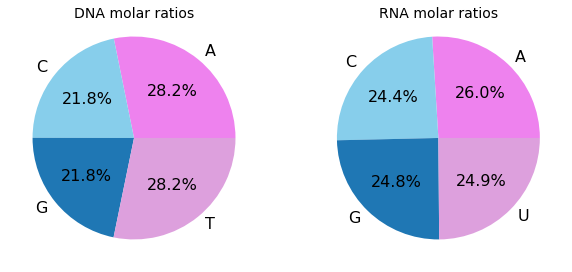

In [33]:
fig, axs = plt.subplots(1,2,figsize=(10,6))
colors=['violet','skyblue','tab:blue','plum']
axs[0].pie(DNA_ratio.Ratio,labels=DNA_ratio.Base,autopct='%1.1f%%',textprops={'fontsize': 16},colors=colors);
axs[1].pie(RNA_ratio.Ratio,labels=['A','C','G','U'],autopct='%1.1f%%',textprops={'fontsize': 16},colors=colors);
axs[0].set_title('DNA molar ratios',y=0.95,fontsize=14)
axs[1].set_title('RNA molar ratios',y=0.95,fontsize=14)